# Electron Cooling

In [2]:
%load_ext autoreload

## Notebook Initialization

In [35]:
%autoreload
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10,10]

import numpy as np
import pickle

import darkhistory.physics as phys
import darkhistory.spec.transferfunction as tf
import darkhistory.utilities as utils

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec

## Import ICS Tables

In [43]:
raw_nonrel_ICS_tf = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/ICS_nonrel.raw","rb"))
raw_rel_ICS_tf = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/ICS_rel.raw","rb"))
raw_engloss_tf = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/ICS_englossspec.raw","rb"))

In [41]:
err = raw_nonrel_ICS_tf.get_grid_values() ==np.nan
print(raw_nonrel_ICS_tf.get_grid_values()[err])
err = raw_rel_ICS_tf.get_grid_values() ==np.nan
print(raw_rel_ICS_tf.get_grid_values()[err])


array([], dtype=float128)

Prepare the ICS transfer functions from these files.

In [48]:
eleceng = phys.me + 10**np.arange(-4, 12, 0.4)
photeng = 10**np.arange(-4, 12, 0.4)
T = 10

ICS_tf = ics_spec(eleceng, photeng, T, 
                  nonrel_tf = raw_nonrel_ICS_tf, rel_tf = raw_rel_ICS_tf
                 )

engloss_tf = engloss_spec(eleceng, photeng, T, 
                          nonrel_tf = raw_engloss_tf, 
                          rel_tf = raw_rel_ICS_tf
                         )

Check that everything is working as expected...

[0.0001, 10000000000000.0, 1e-100, 1000.0]

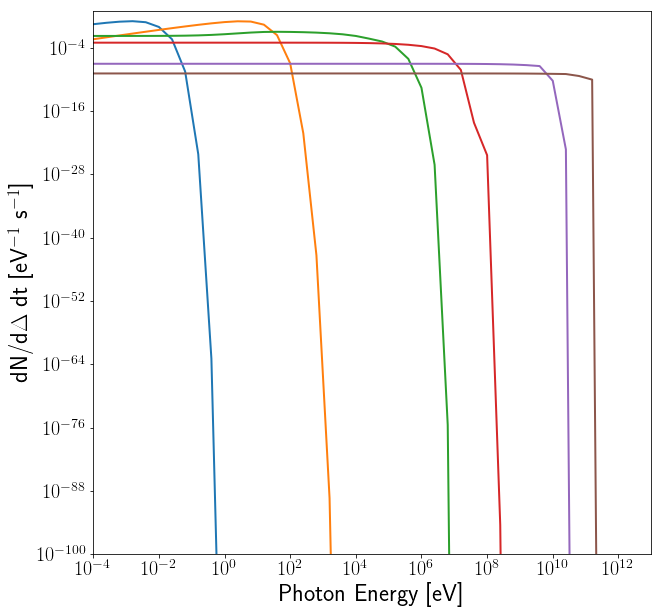

In [49]:
ax = plt.subplot(1,1,1)
plt.rc('text', usetex=True)
comp_elec_kineng = np.array([2e-3, 1e4, 1e7, 1e8, 1e10, 1e11])

engloss_tf.plot(ax, ind=comp_elec_kineng, indtype='in_eng', linewidth=2)

ax.set_xscale('log')
ax.set_yscale('log')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel('Photon Energy [eV]',fontsize=24)

plt.ylabel('dN/d$\Delta$ dt [eV$^{-1}$ s$^{-1}$]',fontsize=24)
plt.axis([1e-4, 1e13, 1e-100, 1e3])

In [30]:
sec_elec_tf = engloss_tf
for spec, in_eng in zip(sec_elec_tf.spec_arr, sec_elec_tf.in_eng):
    new_eng = in_eng - spec.eng
    print(new_eng)
    spec.shift_eng(new_eng, reverse=True)

[  4.74974513e-12  -1.51188638e-04  -5.30957340e-04  -1.48489319e-03
  -3.88107170e-03  -9.90000000e-03  -2.50188643e-02  -6.29957344e-02
  -1.58389319e-01  -3.98007171e-01  -9.99900000e-01  -2.51178643e+00
  -6.30947344e+00  -1.58488319e+01  -3.98106171e+01  -9.99999000e+01
  -2.51188543e+02  -6.30957244e+02  -1.58489309e+03  -3.98107161e+03
  -9.99999990e+03  -2.51188642e+04  -6.30957343e+04  -1.58489319e+05
  -3.98107170e+05  -1.00000000e+06  -2.51188643e+06  -6.30957344e+06
  -1.58489319e+07  -3.98107171e+07  -1.00000000e+08  -2.51188643e+08
  -6.30957344e+08  -1.58489319e+09  -3.98107171e+09  -1.00000000e+10
  -2.51188643e+10  -6.30957344e+10  -1.58489319e+11  -3.98107171e+11]
[  1.51188641e-04  -1.73691167e-12  -3.79768703e-04  -1.33370455e-03
  -3.72988306e-03  -9.74881136e-03  -2.48676757e-02  -6.28445458e-02
  -1.58238131e-01  -3.97855982e-01  -9.99748811e-01  -2.51163524e+00
  -6.30932226e+00  -1.58486807e+01  -3.98104659e+01  -9.99997488e+01
  -2.51188392e+02  -6.30957093e+0

/Users/hongwan/GitHub/DarkHistory/darkhistory/spec/spectools.py:30: RuntimeWarning: invalid value encountered in log
  log_bin_width_low = np.log(eng[1]) - np.log(eng[0])
/Users/hongwan/GitHub/DarkHistory/darkhistory/spec/spectools.py:31: RuntimeWarning: invalid value encountered in log
  log_bin_width_upp = np.log(eng[-1]) - np.log(eng[-2])
/Users/hongwan/GitHub/DarkHistory/darkhistory/spec/spectools.py:33: RuntimeWarning: invalid value encountered in sqrt
  bin_boundary = np.sqrt(eng[:-1] * eng[1:])
/Users/hongwan/GitHub/DarkHistory/darkhistory/spec/spectools.py:35: RuntimeWarning: invalid value encountered in log
  low_lim = np.exp(np.log(eng[0]) - log_bin_width_low / 2)
/Users/hongwan/GitHub/DarkHistory/darkhistory/spec/spectrum.py:548: RuntimeWarning: divide by zero encountered in log
  new_log_bin_width = np.diff(np.log(new_bin_boundary))
/Users/hongwan/anaconda/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:1926: RuntimeWarning: invalid value encountered in 

In [34]:
print(sec_elec_tf[3].dNdE)

[              nan   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000  -0.00000000e+000  -0.00000000e+000
  -0.00000000e+000  -2.86125494e-261  -2.76294844e-103  -5.16795298e-040
  -8.43957515e-015  -6.76385288e-005  -3.38514990e-001               nan
               nan  -5.63697320e-001  -4.12015554e+000  -1.65168544e+000]
